<a href="https://colab.research.google.com/github/kiminlim/ds-section1-sprint3/blob/master/n132-intermediate-linear-algebra/n132a-intermediate-linear-algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 2*

# 📝 Assignment


## 1. 주어진 리스트에 대해서 평균, 분산, 표준편차를 구하는 함수를 작성해보세요. (`mean`같은 builtin function 제외)
> 이후 다음 데이터 [243, 278, 184, 249, 207] 에 대해서 해당 함수를 사용한 결과를 보이세요.

In [317]:
import numpy as np
import pandas as pd

v = [243, 278, 184, 249, 207]

In [318]:
# 평균
def mymean(v):
    a = 0
    for i in range(len(v)):
        a+= v[i]
    result = a / len(v)
    return result

# 모분산 
def myvar(v):
    sum = 0
    for i in range(len(v)):
        sum += (v[i]-mymean(v))**2
    return sum / len(v)

# 표본분산 
def myvar2(v):
    sum = 0
    for i in range(len(v)):
        sum += (v[i]-mymean(v))**2
    return sum / (len(v)-1)

#표준편차
def mystd(v):
    return np.sqrt(myvar(v))
    
res1 = mymean(v)
res2 = myvar(v)
res3 = mystd(v)

In [319]:
#re
def mymean(v):
    return sum(v)/len(v)

def myvar(v):
    return sum(np.array([i-mymean(v) for i in v])**2)/len(v)

def mystd(v):
    return np.sqrt(myvar(v))
    
res1 = mymean(v)
res2 = myvar(v)
res3 = mystd(v)
# 맞음

In [320]:
print(res1, np.mean(v))
print(res2, np.var(v))
print(res3, np.std(v))

232.2 232.2
1090.96 1090.96
33.02968361943541 33.02968361943541


## 2. 위에서 사용된 데이터와 다음 데이터의 공분산과, 상관계수를 구해보세요 [88, 89, 83, 112, 104] 

In [321]:
x = [243, 278, 184, 249, 207] 
y = [88, 89, 83, 112, 104]

In [322]:
# 모 공분산 (: ddof=0)
def mycov(x, y):
    sum=0
    for i in range(len(x)):
        sum += (x[i]-mymean(x))*(y[i]-mymean(y))
    return sum/len(x)

# 표본 공분산 (: ddof=1)
def mycov2(x, y):
    sum=0
    for i in range(len(x)):
        sum += (x[i]-mymean(x))*(y[i]-mymean(y))
    return sum/ (len(x)-1)

mycov(x,y)

57.35999999999999

In [323]:
# 맞는지 확인
sum( (np.array(x)-mymean(x)) * (np.array(y)-mymean(y)) )/5

57.35999999999999

In [324]:
np.cov(x,y, ddof=0) #------------ ddof=0 -> 자유도 0으로 해야 모 공분산 값 나옴!

array([[1090.96,   57.36],
       [  57.36,  119.76]])

In [325]:
# 상관계수
def mycorr(x,y):
    return mycov(x,y) / (mystd(x)*mystd(y))

mycorr(x,y)

0.1586897351257077

In [326]:
# 확인
57.35999999999999 / (10.943491216243562*33.02968361943541)

0.1586897351257077

In [327]:
( mymean(np.array(x)*np.array(y)) - (mymean(x)*mymean(y)) )  / (mystd(x)*mystd(y))

0.1586897351257093

In [328]:
np.corrcoef(x,y,ddof=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


array([[1.        , 0.15868974],
       [0.15868974, 1.        ]])

In [329]:
res4 = mycov2(x,y) # 공분산
res5 = 0.15868974 # 상관계수



In [330]:
print(res4, res5)

71.69999999999999 0.15868974


In [331]:
# 레퍼런스
# 공분산
np.cov(x,y)[0,1] # 틀림.---> 넘파이에 디폴트 ddof는 1임. 즉, 디폴트로는 표본공분산을 구해줌. 나는 모공분산을 구했으므로 답이 다를 수 밖에 없음. --> 표본 공분산 함수로 대체
# 상관계수
# np.corrcoef(x,y)[0,1] # 맞음

71.7

## 3. 다음 벡터들의 span과, 이가 의미하는 바를 설명하세요. 

\begin{align}
g = \begin{bmatrix} 1 & 3 \end{bmatrix}
\qquad
h = \begin{bmatrix} 2 & 6 \end{bmatrix}
\end{align}

In [332]:
res6 = 1 # rank=1

In [333]:
 np.multiply(2, 6)

12

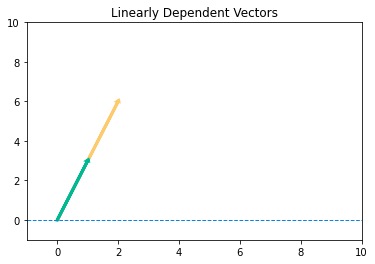

In [334]:
# 그래프
import matplotlib.pyplot as plt

plt.xlim(-1, 10)          
plt.ylim(-1, 10)

# 원 벡터 (초록)
v = [1,3] 

# 선형관계의 벡터
v2 =[2,6] # (노랑)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3', linewidth = 1) # span 선 (파랑)
plt.arrow(0, 0, v2[0], v2[1], linewidth = 3, head_width = .05, head_length = .05, color = '#fdcb6e')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')

plt.title("Linearly Dependent Vectors")
plt.show()

* [1,3], [2,6] 두 벡터는 그래프에서 보여지는 것 과 같이 선형관계에 있다. 
이 두 벡터를 붙여서 만든 행렬 \\
[1,3] \\
[2,6] 에서 2행 - 1행*2이 0벡터가 되므로 rank는 1이다. 

In [335]:
# 레퍼런스코드
g, h = np.array([1, 3]), np.array([2, 6])
gh_matrix = np.stack((g, h))
np.linalg.matrix_rank(gh_matrix) #--> rank 구해주는 넘파이 함수

1

## 4. 다음 벡터들의 span과, 이가 의미하는 바를 설명하세요.

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [336]:
res7 = 3 # rank=3

* 가우스 소거법으로 어떠한 행도 0벡터가 되지 않으므로 rank는 3이다.
즉, l, m, n 세개의 벡터는 모두 서로 일차 독립이다. 

In [337]:
# 레퍼런스
l, m, n = np.array([1, 2, 3]), np.array([-1, 0, 7]), np.array([4, 8, 2])
lmn_matrix = np.stack((l, m, n))
np.linalg.matrix_rank(lmn_matrix)

3

## 5. 다음 매트릭스의 rank를 구하세요

\begin{align}
P = \begin{bmatrix} 
0 & 2 & 5 \\
 3 & 6 & 12 \\
3 & 2 & 2
\end{bmatrix}
\end{align}

In [338]:
res8 = 2 # rank 

In [339]:
# 레퍼런스
mat_p = np.array([[0, 2, 5], [3, 6, 12], [3, 2, 2]])
np.linalg.matrix_rank(mat_p)

2

## Form

In [340]:
#1
mymean([1, 2, 3, 4, 5, 6])

3.5

In [341]:
np.mean([1, 2, 3, 4, 5, 6])

3.5

In [342]:
#2
myvar([1, 2, 3, 4, 5, 6])

2.9166666666666665

In [343]:
np.var([1, 2, 3, 4, 5, 6])

2.9166666666666665

In [358]:
#3
np.cov([1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1]) # 넘파이는 디폴트로 표본공분산을 반환함. (모공분산을 구하려면 ddof=0으로 해야함.) --기창님 : 샘플링한게 아니기 때문에 모분산, 공분산 구하기.
# np.cov([1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1],ddof=1) # 넘파이는 디폴트로 표본공분산을 반환함. (모공분산을 구하려면 ddof=0으로 해야함.) 폼-- 정민님: 대부분 샘플데이터를 쓰기 때문에 ddof=1로 해야 합니다.

array([[ 3.5, -3.5],
       [-3.5,  3.5]])

In [359]:
mycov([1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1]) # 모 공분산(분모 N) --> 모 공분산이 아니라 표본 공분산으로 채점 한 것 같다.

-2.9166666666666665

In [360]:
mycov2([1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1]) # 표본 공분산(분모 N-1) # 3번 답 -3.5로 변경.

-3.5

In [347]:
np.corrcoef([1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1],ddof=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


array([[ 1., -1.],
       [-1.,  1.]])

In [348]:
np.corrcoef([1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1])

array([[ 1., -1.],
       [-1.,  1.]])

In [349]:
mycorr([1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1])

-1.0

# 🔥 도전과제 

주어진 데이터 (x, y)에 대해서 `y = x` 라는 벡터에 대해 projection을 계산하는 함수를 작성하세요. 
- (x, y) 는 (0, 0) 에서 (x, y)로 가는 벡터라 가정합니다.

이후

- 입력된 데이터를 파란색 선으로, 
- `y = x` 라는 벡터를 빨간색 선으로, 마지막으로 
- projection 된 선을 녹색 점선(dashed)으로 그래프에 그리세요.

In [351]:
v = [7, 4]
x=7
y = x

def myProjection(v):
  k = v[0]
  k_j = np.array([k, k])
  k_j_norm = np.sqrt(sum(k_j**2))
  vprime = (np.dot(v, k_j)/k_j_norm**2)*k_j  
  return vprime

vprime = myProjection(v)
vprime


array([5.5, 5.5])

In [352]:
import matplotlib.pyplot as plt

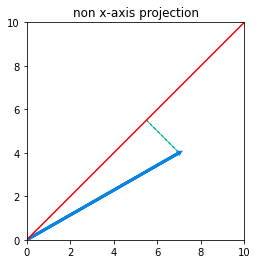

In [353]:
plt.xlim(0, 10)          
plt.ylim(0, 10)

v = [7, 4] # x=7,y=4
proj =  vprime
# x_minus_proj = w - proj

plt.gca().set_aspect('equal')

x_vals = np.array(axes.get_xlim())
y_vals =  x_vals

plt.plot(x_vals, y_vals, color = 'r') # x=y
plt.arrow(v[0], v[1], vprime[0]-v[0], vprime[1]-v[1], linestyle = '--', color = '#00b894')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#0984e3') # [7,4]벡터

plt.title("non x-axis projection")
plt.show()